In [132]:
import pandas as pd
import numpy as np

train = pd.read_csv('Titanic.csv')

train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train = train.drop(['Cabin','Ticket','Last Name','First Name','Unnamed: 0'],axis=1)

train['Pclass'] = train['Pclass'].apply(str)

# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
 for_dummy = train.pop(col)
 train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [133]:
X = train.drop(['Survived'],axis=1)
y = train['Survived']

In [134]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
y_pred = dt.predict(X_test)

In [137]:
from sklearn.metrics import roc_curve,auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5961538461538461

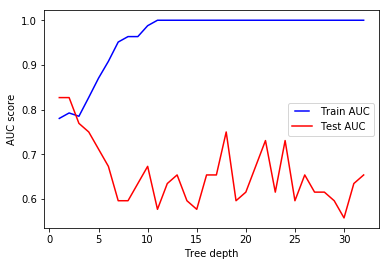

In [138]:
max_depths = np.linspace(1,32,32,endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth= max_depth)
    dt.fit(X_train,y_train)
    
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
        